In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinical_df, on='Mouse ID', how='outer')

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [3]:
combined_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df_mean = combined_df.groupby(['Drug', 'Timepoint']).mean()
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(grouped_df_mean)
# Preview DataFrame
mean_tumor_volume_df.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [5]:
mean_tumor_vol_df = pd.pivot_table(combined_df, index = ["Timepoint"], 
                               columns =['Drug'], values = "Tumor Volume (mm3)", 
                               aggfunc = np.mean)
mean_tumor_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_calculation = {"Tumor Volume (mm3)": stats.sem, "Metastatic Sites": stats.sem}
grouped_df_sem = combined_df.groupby(["Drug", "Timepoint"]).agg(sem_calculation)
# Convert to DataFrame
sem_tumor_volume = pd.DataFrame(grouped_df_sem)
# Preview DataFrame
sem_tumor_volume.head()


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                    0.000000          0.000000
          5                    0.448593          0.074833
          10                   0.702684          0.125433
          15                   0.838617          0.132048
          20                   0.909731          0.161621

In [7]:
sem_tumor_vol_df = pd.pivot_table(combined_df, index = ["Timepoint"], 
                               columns =['Drug'], values = "Tumor Volume (mm3)", 
                               aggfunc = stats.sem)
sem_tumor_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


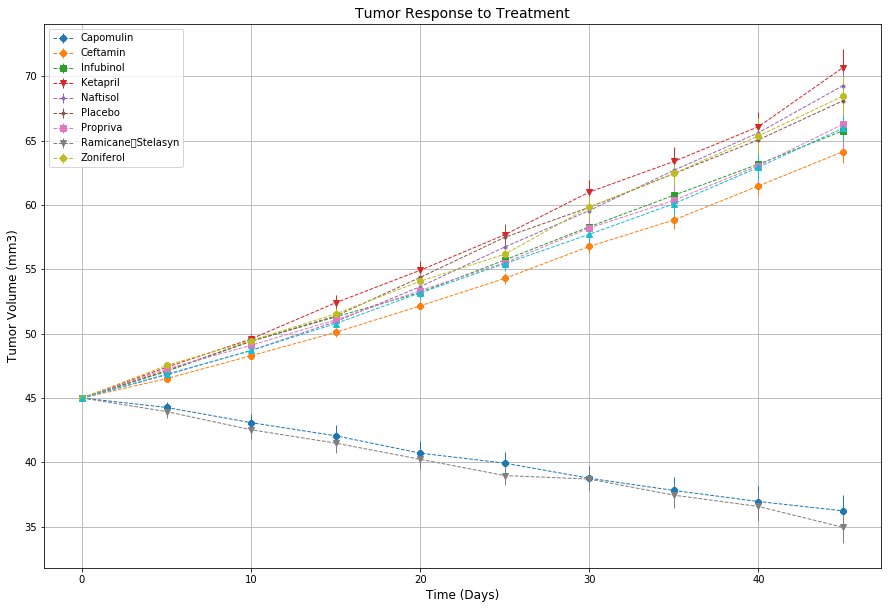

In [8]:
# Generate the Plot (with Error Bars)
x_axis = [mean_tumor_vol_df[num].index.tolist() for num in mean_tumor_vol_df.columns]
y_axis = [mean_tumor_vol_df[num].tolist() for num in mean_tumor_vol_df.columns]
s_error = [sem_tumor_vol_df[num].tolist() for num in sem_tumor_vol_df.columns]


plt.figure(figsize=(15,10))
markers = ["o", "v", "s","d",".","^","<",">","8"]
for num in range(len(s_error)):
    plt.errorbar(x_axis[num], y_axis[num], yerr = s_error[num], 
                 marker = random.choice(markers), 
                 linestyle = "--",
                 markersize='6', linewidth = 1)
plt.grid(True)
plt.xlabel("Time (Days)", fontsize = 12)
plt.ylabel("Tumor Volume (mm3)", fontsize = 12)
plt.title("Tumor Response to Treatment", fontsize = 14)
plt.legend(("Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane	Stelasyn","Zoniferol"),loc="upper left")

# Save the Figure
plt.savefig("../Images/tumnor_response_to_treatment.png")

plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastic_response_mean = pd.pivot_table(combined_df, index = ["Timepoint"], 
                               columns =["Drug"], values = "Metastatic Sites", 
                               aggfunc = np.mean)

# Preview DataFrame
metastic_response_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
# Store the SEM Met. Site Data Grouped by Drug and Timepoint 
metastic_response_sem = pd.pivot_table(combined_df, index = ['Timepoint'], 
                               columns =['Drug'], values = 'Metastatic Sites', 
                               aggfunc = stats.sem)
metastic_response_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


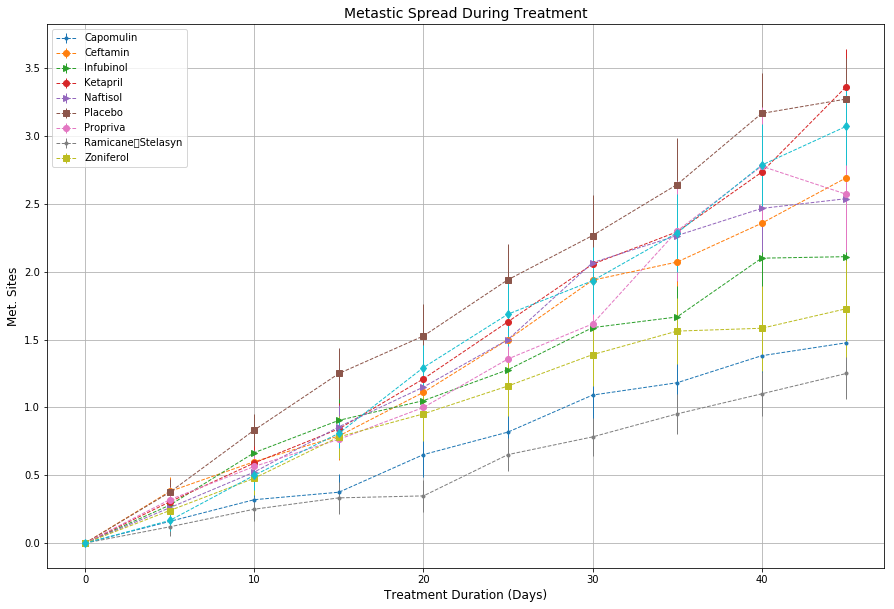

In [11]:
# Generate the Plot (with Error Bars)
metastic_x_axis = [metastic_response_mean[num].index.tolist() for num in metastic_response_mean.columns]
metastic_y_axis = [metastic_response_mean[num].tolist() for num in metastic_response_mean.columns]
metastic_s_error = [metastic_response_sem[num].tolist() for num in metastic_response_sem.columns]

plt.figure(figsize=(15,10))
markers = ["o", "v", "s","d",".","^","<",">","8"]
for num in range(len(s_error)):
    plt.errorbar(metastic_x_axis[num], metastic_y_axis[num], yerr = metastic_s_error[num], 
                 marker = random.choice(markers), 
                 linestyle = "--",
                 markersize='6', linewidth = 1)
plt.grid(True)
plt.xlabel("Treatment Duration (Days)", fontsize = 12)
plt.ylabel("Met. Sites", fontsize = 12)
plt.title("Metastic Spread During Treatment", fontsize = 14)
plt.legend(("Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane	Stelasyn","Zoniferol"),loc="upper left")

# Save the Figure
plt.savefig("../Images/metastic_spread_during_treatment.png")

plt.show()



## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

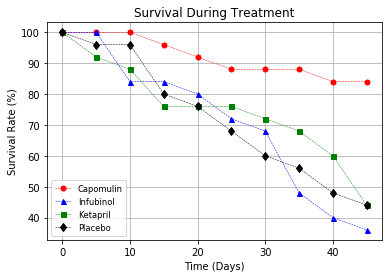

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

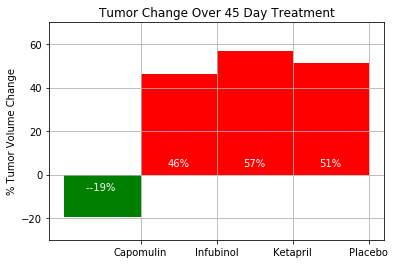